<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem, but in our case, we are going to simplify it: predixting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view ans fit

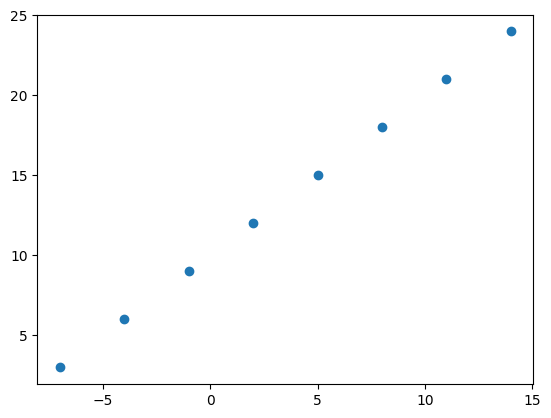

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

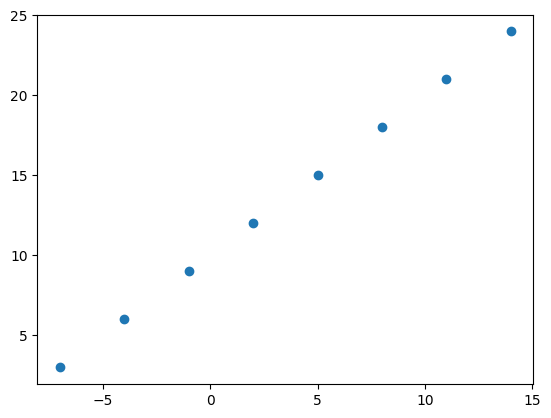

In [11]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input ans output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function(in others words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
       optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent
       metrics = ["mae"] )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.4400 - mae: 11.4400
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 11.3075 - mae: 11.3075
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 11.1750 - mae: 11.1750
Epoch 4/5
1/1 [==============================] - 0s 33ms/step - loss: 11.0425 - mae: 11.0425
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9100 - mae: 10.9100


In [13]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 1s 581ms/step


array([[13.030681]], dtype=float32)

In [15]:
y_pred + 11

array([[24.030682]], dtype=float32)

## Impoving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs**(leave it training for longer) or on more data(give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 680ms/step - loss: 11.2990 - mae: 11.2990
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 11.1665 - mae: 11.1665
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0340 - mae: 11.0340
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9015 - mae: 10.9015
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.7690 - mae: 10.7690
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6365 - mae: 10.6365
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5040 - mae: 10.5040
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.3715 - mae: 10.3715
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2390 - mae: 10.2390
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 10.1065 - mae: 10.1065
Epoch 11/100
1/1 [==============================

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has inproved...
model.predict([17])

1/1 [==============================] - 0s 68ms/step


array([[29.963264]], dtype=float32)

##Exercise

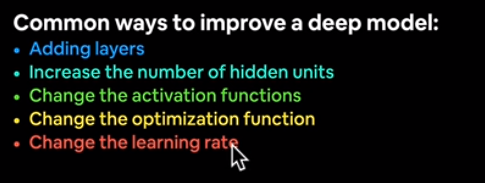

In [49]:
# Let's make model

# 1. Create the model(this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
      #  optimizer = tf.keras.optimizers.SGD(),
       optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
       metrics = ["mae"])

# Fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 611ms/step - loss: 13.4103 - mae: 13.4103
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6971 - mae: 12.6971
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9894 - mae: 11.9894
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2823 - mae: 11.2823
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5716 - mae: 10.5716
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8532 - mae: 9.8532
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1238 - mae: 9.1238
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3802 - mae: 8.3802
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 7.6196 - mae: 7.6196
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8586 - mae: 6.8586
Epoch 11/100
1/1 [==============================] - 0s 12m

In [50]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [51]:
# Let's try to make a prediction
model.predict([17])

1/1 [==============================] - 0s 85ms/step


array([[26.852818]], dtype=float32)